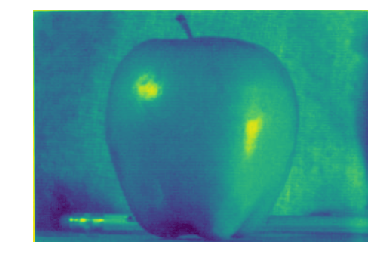

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('../images/apple.png',0)
rows,cols = img.shape

plt.figure(figsize=(6,6))
plt.imshow(img) # display the image
plt.axis('off')
plt.show()



In [ ]:
# Translation is the shifting of object’s location. If you know the shift in (x,y) direction, let it be (t_x,t_y)

# image Translation

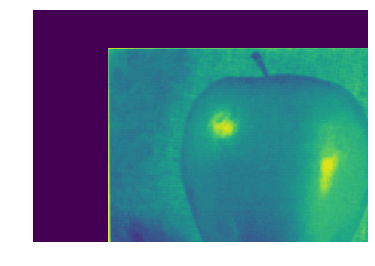

In [4]:
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))


plt.figure(figsize=(6,6))
plt.imshow(dst) # display the image
plt.axis('off')
plt.show()

# cv2.imshow('img',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Rotation
## Rotation of an image for an angle \theta is achieved by the transformation matrix 

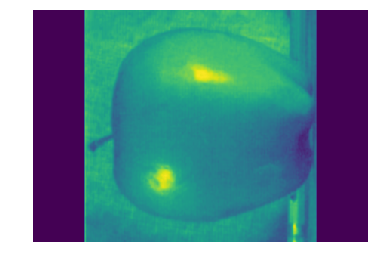

In [7]:
img = cv2.imread('../images/apple.png',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(6,6))
plt.imshow(dst) # display the image
plt.axis('off')
plt.show()

# Perspective Transformation


#### For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.

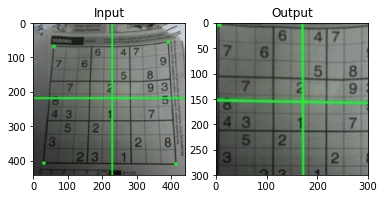

In [6]:
img = cv2.imread('../images/sudokusmall.png')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# 2D Convolution ( Image Filtering )
### As for one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. A LPF helps in removing noise, or blurring the image. A HPF filters helps in finding edges in an image.

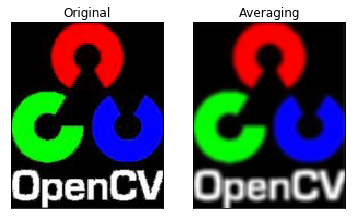

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../images/opencv_logo.png')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

#  Median Filtering
### Here, the function cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value.

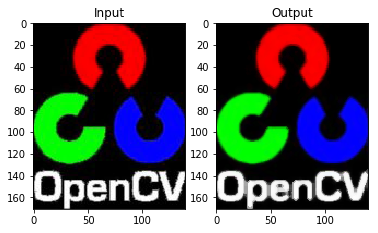

In [9]:
median = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(median),plt.title('Output')
plt.show()

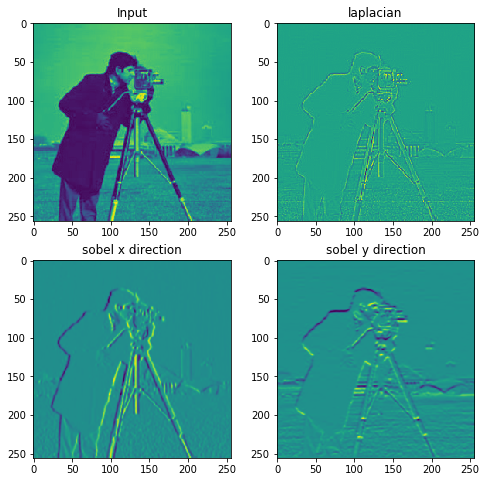

In [18]:
img = cv2.imread('../images/cameraman.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(8,8))
plt.subplot(221),plt.imshow(img),plt.title('Input')
plt.subplot(222),plt.imshow(laplacian),plt.title('laplacian')
plt.subplot(223),plt.imshow(sobelx),plt.title('sobel x direction')
plt.subplot(224),plt.imshow(sobely),plt.title('sobel y direction')
plt.show()

# canny edge detection
#### Canny Edge Detection is a popular edge detection algorithm. It was developed by John F. Canny in 1986.

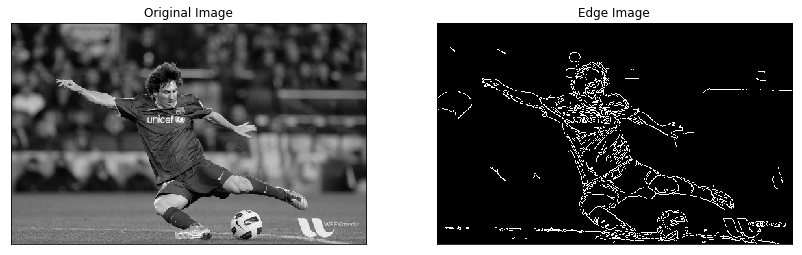

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../images/messi5.jpg',0)
edges = cv2.Canny(img,100,200)

plt.figure(figsize=(14,18))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()